<a href="https://colab.research.google.com/github/jul178/python-academic-projects/blob/main/pandas_project_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Учасники команди:**
1. Денисова Марія
2. Деменко Софія
3. Аланія Софія
4. Дуб Юлія
5. Завада Софія

***Мета дослідження:*** підтвердити або спростувати наявність звʼязку між такими факторами:
1. Успішність учня та становище його сімʼї (чи живуть батьки разом, розмір сімʼї)
2. Наявність інтернету вдома та стан здоровʼя (а разом з тим споживання алкоголю)
3. Дослідження часу на навчання (час на навчання та успішність, час на навчаня та вільний час) і в якому віці учні найкраще вчаться


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install gdown

FILE_MATH_ID = '1FjdiJkBRCxRSUj1Elpnb3hXHkZnZPO1f'
FILE_PORT_ID = '1hofgB6gtdy45OLmg_wFgEhoDoiwwV_yL'

!gdown --id {FILE_MATH_ID} -O "student-mat 2.csv"
!gdown --id {FILE_PORT_ID} -O "student-por 2.csv"

mat_info = pd.read_csv('student-mat 2.csv', sep=';')
port_info = pd.read_csv('student-por 2.csv', sep=';')

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FjdiJkBRCxRSUj1Elpnb3hXHkZnZPO1f
To: /content/student-mat 2.csv
100% 57.0k/57.0k [00:00<00:00, 69.7MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hofgB6gtdy45OLmg_wFgEhoDoiwwV_yL
To: /content/student-por 2.csv
100% 93.2k/93.2k [00:00<00:00, 75.2MB/s]


**Успішність учня та становище його сім'ї.**
1) Чи живуть батьки разом.
2) Розмір сім'ї


In [ ]:
mat_info = pd.read_csv('student-mat 2.csv', sep=';')
port_info = pd.read_csv('student-por 2.csv', sep=';')
columns_to_drop = ['school', 'sex', 'age', 'address',
                   'reason', 'guardian', 'traveltime',
                   'studytime', 'failures', 'schoolsup',
                   'famsup', 'paid', 'activities', 'nursery',
                   'higher', 'internet', 'romantic', 'famrel',
                   'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences' ]

common_key_cols = ['Pstatus', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob']
score_cols = ['G1', 'G2', 'G3']

mat_filtered = mat_info[common_key_cols + score_cols].copy()
mat_filtered.rename(columns={'G1': 'G1_math', 'G2': 'G2_math', 'G3': 'G3_math'}, inplace=True)

por_filtered = port_info[common_key_cols + score_cols].copy()
por_filtered.rename(columns={'G1': 'G1_port', 'G2': 'G2_port', 'G3': 'G3_port'}, inplace=True)

combined_correct = pd.merge(mat_filtered, por_filtered, on=common_key_cols, how='inner')

final_cols_to_keep = ['Pstatus', 'famsize', 'G1_math', 'G2_math', 'G3_math', 'G1_port', 'G2_port', 'G3_port']

final_grades_df = combined_correct[final_cols_to_keep]
print(final_grades_df.head())
print()

aggregated_df = final_grades_df.groupby(['Pstatus', 'famsize']).mean().reset_index()
print(aggregated_df.head())

  Pstatus famsize  G1_math  G2_math  G3_math  G1_port  G2_port  G3_port
0       A     GT3        5        6        6        0       11       11
1       T     GT3        5        5        6        9       11       11
2       T     GT3        5        5        6       13       13       13
3       T     GT3        5        5        6       11       12       13
4       T     GT3        5        5        6       14       13       13

  Pstatus famsize    G1_math    G2_math    G3_math    G1_port    G2_port  \
0       A     GT3  11.400000  11.628571  11.685714  12.485714  12.771429   
1       A     LE3  11.892857  12.250000  12.607143  12.821429  13.214286   
2       T     GT3  10.135035   9.841042   9.488570  11.419458  11.552366   
3       T     LE3  11.088608  11.028481  10.379747  11.844937  11.778481   

     G3_port  
0  13.285714  
1  13.607143  
2  11.820308  
3  12.142405  


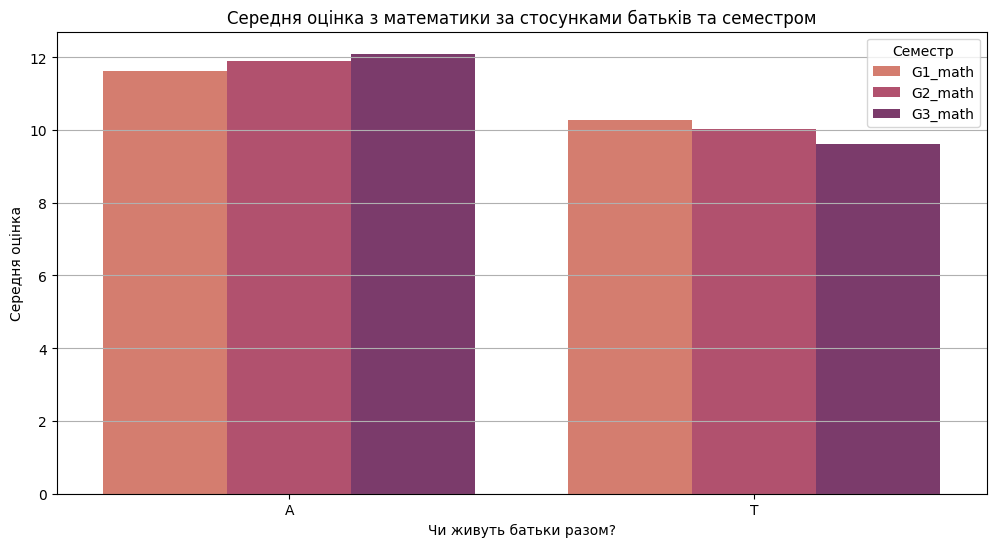

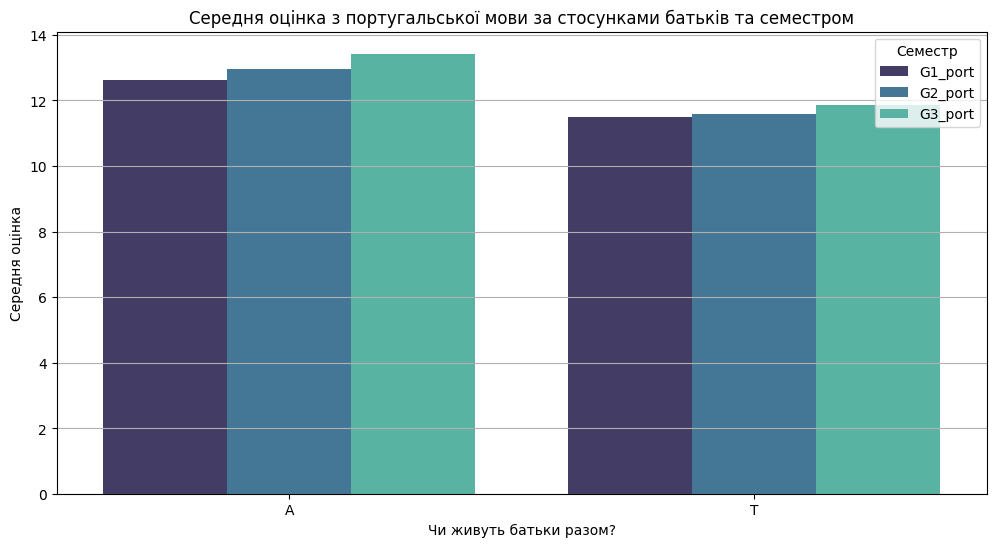

In [ ]:
#Чи живуть батьки разом?
math_scores = final_grades_df[['Pstatus', 'G1_math', 'G2_math', 'G3_math']]
port_scores = final_grades_df[['Pstatus', 'G1_port', 'G2_port', 'G3_port']]

math_long = math_scores.melt(
    id_vars='Pstatus',
    value_vars=['G1_math', 'G2_math', 'G3_math'],
    var_name='Semester',
    value_name='Math_Score')

port_long = port_scores.melt(id_vars = 'Pstatus',
    value_vars = ['G1_port', 'G2_port', 'G3_port'],
    var_name = 'Semester',
    value_name = 'Port_Score')

math_trend = math_long.groupby(['Pstatus', 'Semester'], as_index=False)['Math_Score'].mean()
port_trend = port_long.groupby(['Pstatus', 'Semester'], as_index=False)['Port_Score'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=math_trend,
    x='Pstatus',
    y='Math_Score',
    hue='Semester',
    palette='flare'
)
plt.title('Середня оцінка з математики за стосунками батьків та семестром')
plt.xlabel('Чи живуть батьки разом?')
plt.ylabel('Середня оцінка')
plt.legend(title='Семестр')
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(
    data=port_trend,
    x='Pstatus',
    y='Port_Score',
    hue='Semester',
    palette='mako'
)
plt.title('Середня оцінка з португальської мови за стосунками батьків та семестром')
plt.xlabel('Чи живуть батьки разом?')
plt.ylabel('Середня оцінка')
plt.legend(title='Семестр')
plt.grid(axis='y')
plt.show()

Index(['Pstatus', 'Semester', 'Math_Score'], dtype='object')


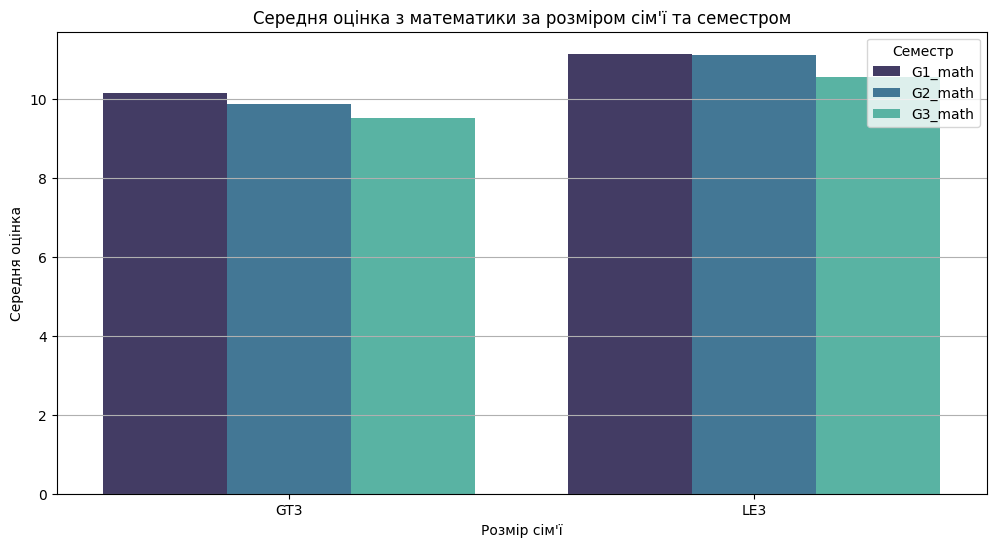

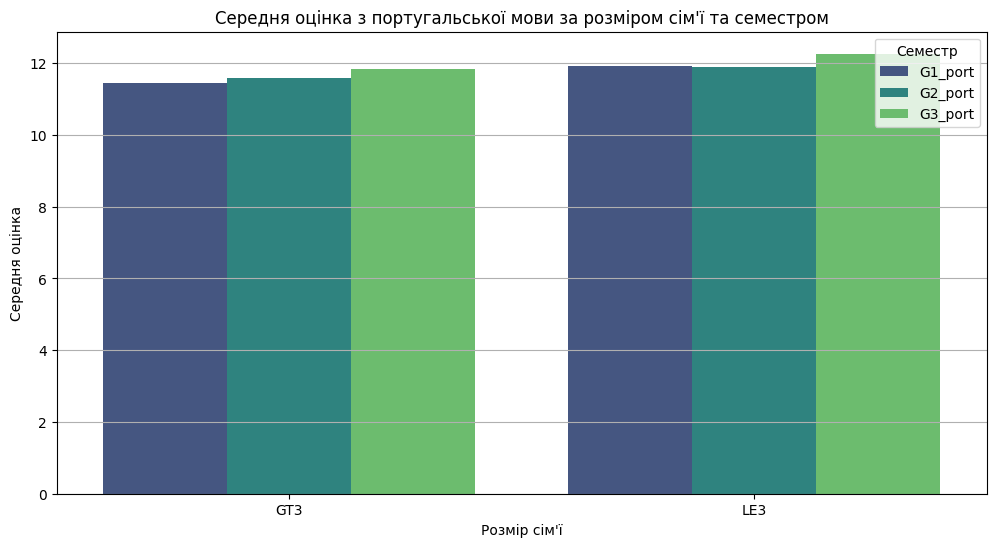

In [ ]:
#Розмір сім'ї

math_scores = final_grades_df[['famsize', 'G1_math', 'G2_math', 'G3_math']]
port_scores = final_grades_df[['famsize', 'G1_port', 'G2_port', 'G3_port']]
print(math_long.columns)

math_long = math_scores.melt(
    id_vars='famsize',
    value_vars=['G1_math', 'G2_math', 'G3_math'],
    var_name='Semester',
    value_name='Math_Score')

port_long = port_scores.melt(id_vars = 'famsize',
    value_vars = ['G1_port', 'G2_port', 'G3_port'],
    var_name = 'Semester',
    value_name = 'Port_Score')

math_trend = math_long.groupby(['famsize', 'Semester'], as_index=False)['Math_Score'].mean()
port_trend = port_long.groupby(['famsize', 'Semester'], as_index=False)['Port_Score'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=math_trend,
    x='famsize',
    y='Math_Score',
    hue='Semester',
    palette='mako'
)
plt.title("Середня оцінка з математики за розміром сім'ї та семестром")
plt.xlabel("Розмір сім'ї")
plt.ylabel('Середня оцінка')
plt.legend(title='Семестр')
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(
    data=port_trend,
    x='famsize',
    y='Port_Score',
    hue='Semester',
    palette='viridis'
)
plt.title("Середня оцінка з португальської мови за розміром сім'ї та семестром")
plt.xlabel("Розмір сім'ї")
plt.ylabel('Середня оцінка')
plt.legend(title='Семестр')
plt.grid(axis='y')
plt.show()

Учні, чиї батьки живуть окремо (A), у середньому мають трошки вищі оцінки, ніж ті, у кого живуть разом (T). Різниця є, але невелика - це означає, що цей фактор може впливати, але не сильно.

Немає помітного зв’язку між кількістю членів сім’ї та оцінками.
Тому розмір сімʼї не є важливим фактором успішності.




2. Зв'язок між наявністю інтернету вдома та станом здоровʼя, також наявністю інтернету та споживанням алкоголю

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mat_info = pd.read_csv('student-mat 2.csv', sep=';')
port_info = pd.read_csv('student-por 2.csv', sep=';')

common_key_cols = ['school', 'sex', 'age', 'address', 'guardian' ]
needed_cols = ['internet', 'health', 'Dalc', 'Walc']

mat_filtered = mat_info[common_key_cols + needed_cols].copy()
mat_filtered.rename(columns={'health': 'health_math', 'Dalc': 'Dalc_math', 'Walc': 'Walc_math'}, inplace=True)

por_filtered = port_info[common_key_cols + ['health', 'Dalc', 'Walc']].copy()
por_filtered.rename(columns={'health': 'health_port', 'Dalc': 'Dalc_port', 'Walc': 'Walc_port'}, inplace=True)


combined_correct = pd.merge(mat_filtered, por_filtered, on=common_key_cols, how='inner')

final_cols_to_keep = ['internet','health_port','Dalc_port','Walc_port','health_math','Dalc_math','Walc_math' ]

final_1 = combined_correct[final_cols_to_keep]
print(final_1.head())
print()


aggregated_df = final_1.groupby('internet').mean().reset_index()
print(aggregated_df.head())


  internet  health_port  Dalc_port  Walc_port  health_math  Dalc_math  \
0       no            3          1          1            3          1   
1       no            5          1          3            3          1   
2       no            3          1          1            3          1   
3       no            5          1          1            3          1   
4       no            3          1          1            3          1   

   Walc_math  
0          1  
1          1  
2          1  
3          1  
4          1  

  internet  health_port  Dalc_port  Walc_port  health_math  Dalc_math  \
0       no     3.633157   1.376543   2.194004      3.77425   1.290123   
1      yes     3.578932   1.394434   2.224300      3.45309   1.395182   

   Walc_math  
0   2.151675  
1   2.215921  


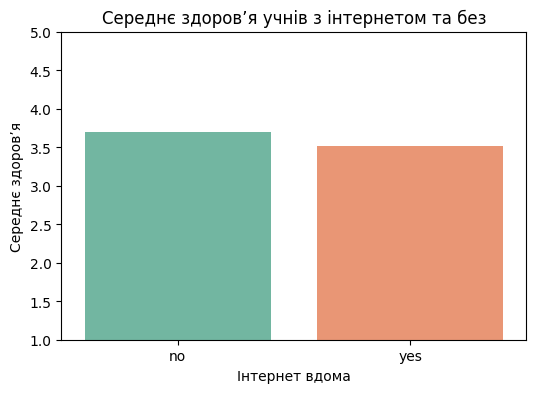

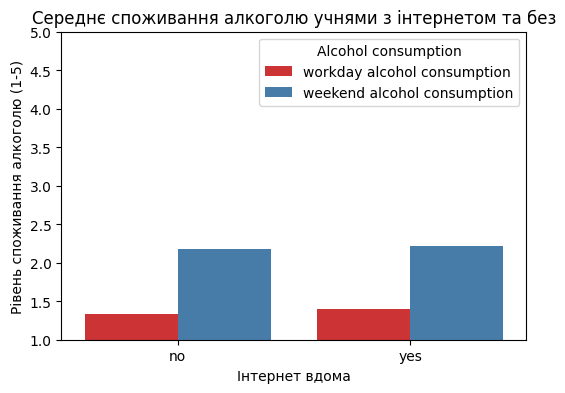

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#1)Здоров’я по інтернету
aggregated_df['health_avg'] = (aggregated_df['health_port'] + aggregated_df['health_math']) / 2


plt.figure(figsize=(6,4))
sns.barplot(data=aggregated_df, x='internet', y='health_avg', palette='Set2', hue='internet', dodge=False)
plt.title('Середнє здоров’я учнів з інтернетом та без')
plt.ylabel('Середнє здоров’я')
plt.xlabel('Інтернет вдома')
plt.ylim(1, 5)
plt.show()

#2)Споживання алкоголю по інтернету
aggregated_df['workday alcohol consumption'] = (aggregated_df['Dalc_port'] + aggregated_df['Dalc_math']) / 2
aggregated_df['weekend alcohol consumption'] = (aggregated_df['Walc_port'] + aggregated_df['Walc_math']) / 2

alc_df = aggregated_df.melt(id_vars='internet', value_vars=['workday alcohol consumption','weekend alcohol consumption'],
                            var_name='Alcohol consumption', value_name='Alcohol_level')

plt.figure(figsize=(6,4))
sns.barplot(data=alc_df, x='internet', y='Alcohol_level', hue='Alcohol consumption', palette='Set1')
plt.title('Середнє споживання алкоголю учнями з інтернетом та без')
plt.ylabel('Рівень споживання алкоголю (1-5)')
plt.xlabel('Інтернет вдома')
plt.ylim(1, 5)
plt.show()



Наявність інтернету вдома частково впливає на рівень здоров’я учнів. Учні з інтернетом та без вживають алкоголь на схожому рівні.





3. Дослідження часу на навчання (час на навчання та успішність, час на навчання та вільний час)



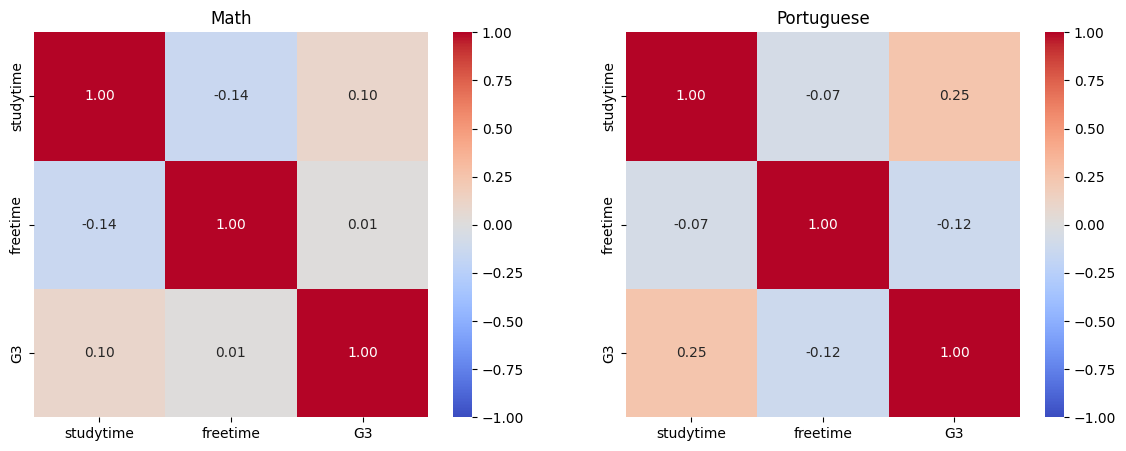

In [ ]:
# час на навчання та успішність
cols = ['studytime', 'freetime', 'G3']

corr_matrix_math = mat_info[cols].corr()
corr_matrix_por = port_info[cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(
    corr_matrix_math,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    ax=axes[0]
)
axes[0].set_title('Math')
sns.heatmap(
    corr_matrix_por,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    ax=axes[1]
)
axes[1].set_title('Portuguese')
plt.show()


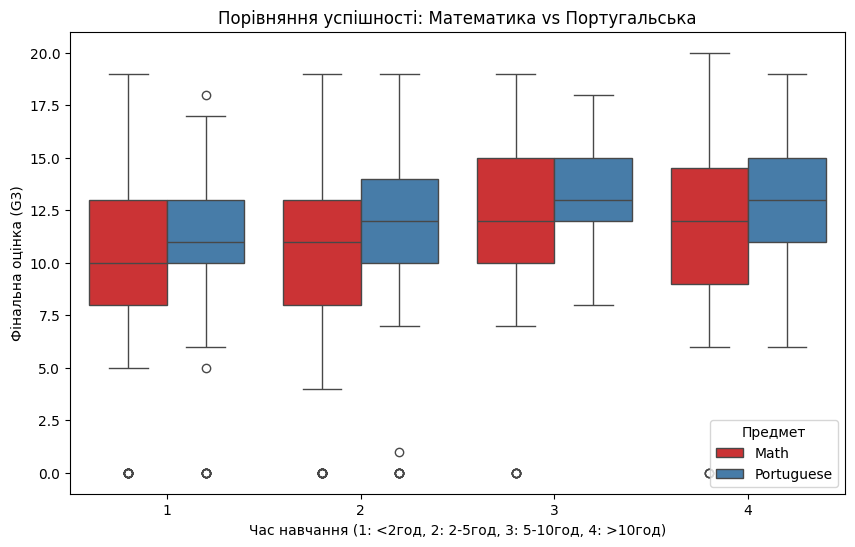

In [ ]:
# час на навчаня та вільний час
mat_info['Subject'] = 'Math'
port_info['Subject'] = 'Portuguese'

all_students = pd.concat([mat_info, port_info])

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='studytime',
    y='G3',
    data=all_students,
    hue='Subject',
    palette='Set1'
)
plt.title('Порівняння успішності: Математика vs Португальська')
plt.xlabel('Час навчання (1: <2год, 2: 2-5год, 3: 5-10год, 4: >10год)')
plt.ylabel('Фінальна оцінка (G3)')
plt.legend(title='Предмет')
plt.show()

Чи впливає час навчання на оцінку?
Учні, які вчаться 5–10 годин (категорія 3), мають найвищі середні бали.

Португальська мова : тут спостерігається помітний позитивний зв'язок. Коефіцієнт 0.25 для португальської свідчить про те, що чим більше учень витратив на вивчення мови, тим вищу оцінку він, ймовірно, отримає.
Для математики зв'язок дуже слабкий. Коефіцієнт 0.10 говорить про те, що просте кількість годин проведені за вивченням математики не гарантує високої оцінки.                 





**4**. **Як вік студента впливає на успішність**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mat_info = pd.read_csv('student-mat 2.csv', sep=';')
port_info = pd.read_csv('student-por 2.csv', sep=';')

columns_to_drop = ['famsize', 'Pstatus',
                   'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime',
                   'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
                   'goout', 'Dalc', 'Walc', 'health', 'absences']

common_key_cols = ['school', 'sex', 'age', 'address', 'guardian']
score_cols = ['G1', 'G2', 'G3']

mat_filtered = mat_info[common_key_cols + score_cols].copy()
mat_filtered.rename(columns={'G1': 'G1_math', 'G2': 'G2_math', 'G3': 'G3_math'}, inplace=True)

por_filtered = port_info[common_key_cols + score_cols].copy()
por_filtered.rename(columns={'G1': 'G1_port', 'G2': 'G2_port', 'G3': 'G3_port'}, inplace=True)


combined_correct = pd.merge(mat_filtered, por_filtered, on=common_key_cols, how='inner')

final_cols_to_keep = ['age', 'G1_math', 'G2_math', 'G3_math', 'G1_port', 'G2_port', 'G3_port']

final_grades_df = combined_correct[final_cols_to_keep]
print(final_grades_df.head())
print()


aggregated_df = final_grades_df.groupby('age').mean().reset_index()
print(aggregated_df.head())



   age  G1_math  G2_math  G3_math  G1_port  G2_port  G3_port
0   18        5        6        6        0       11       11
1   18        5        6        6       10        9        8
2   18        5        6        6       10       10       10
3   18        5        6        6        9        8       10
4   18        5        6        6        8        7        7

   age    G1_math    G2_math    G3_math    G1_port    G2_port    G3_port
0   15  11.547548  11.867013  11.943536  12.265230  12.219168  12.530461
1   16  10.935792  11.191966  10.963451  12.365163  12.322687  12.676325
2   17  11.014358  10.542381  10.368226  12.258916  12.574340  13.101436
3   18  10.642857  10.264456   9.744898  11.554422  11.888605  12.226190
4   19  10.329897   9.381443   8.020619  10.175258  10.597938  11.072165


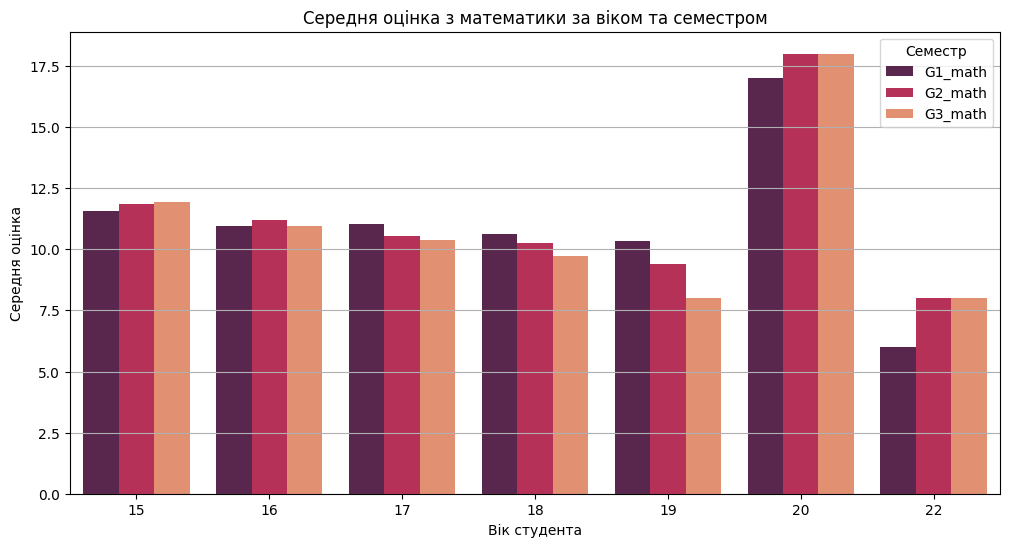

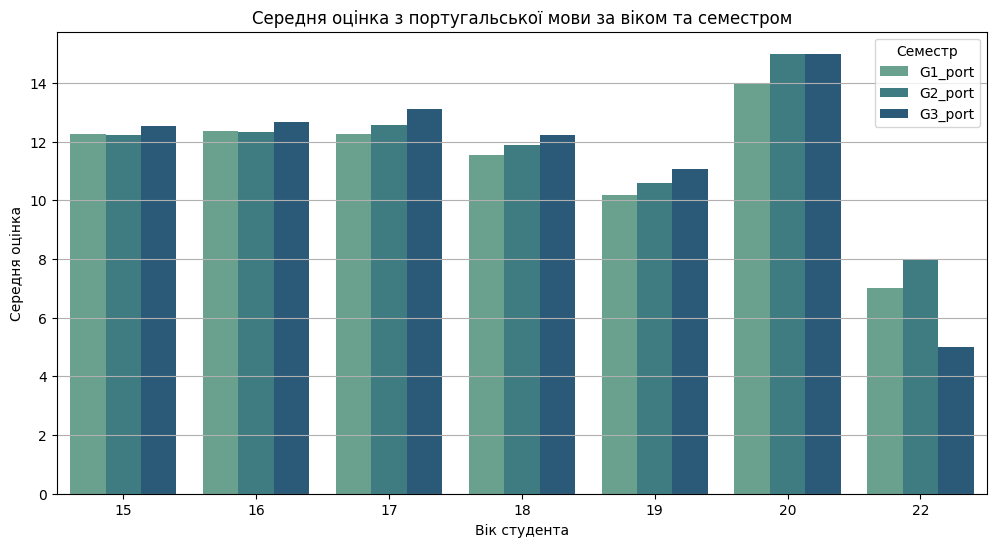

In [ ]:
#SCORES BAR CHART FOR AGE AND GRADES
math_scores = final_grades_df[['age', 'G1_math', 'G2_math', 'G3_math']]
port_scores = final_grades_df[['age', 'G1_port', 'G2_port', 'G3_port']]

math_long = math_scores.melt(
    id_vars='age',
    value_vars=['G1_math', 'G2_math', 'G3_math'],
    var_name='Semester',
    value_name='Math_Score')

port_long = port_scores.melt(id_vars = 'age',
    value_vars = ['G1_port', 'G2_port', 'G3_port'],
    var_name = 'Semester',
    value_name = 'Port_Score')

math_trend = math_long.groupby(['age', 'Semester'], as_index=False)['Math_Score'].mean()
port_trend = port_long.groupby(['age', 'Semester'], as_index=False)['Port_Score'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=math_trend,
    x='age',
    y='Math_Score',
    hue='Semester',
    palette='rocket'
)
plt.title('Середня оцінка з математики за віком та семестром')
plt.xlabel('Вік студента')
plt.ylabel('Середня оцінка')
plt.legend(title='Семестр')
plt.grid(axis='y')
plt.savefig('grouped_bar_chart_math_scores.png',
            bbox_inches='tight'
            )


plt.figure(figsize=(12, 6))
sns.barplot(
    data=port_trend,
    x='age',
    y='Port_Score',
    hue='Semester',
    palette='crest'
)
plt.title('Середня оцінка з португальської мови за віком та семестром')
plt.xlabel('Вік студента')
plt.ylabel('Середня оцінка')
plt.legend(title='Семестр')
plt.grid(axis='y')
plt.savefig('grouped_bar_chart_port_scores.png',
            bbox_inches='tight'
            )



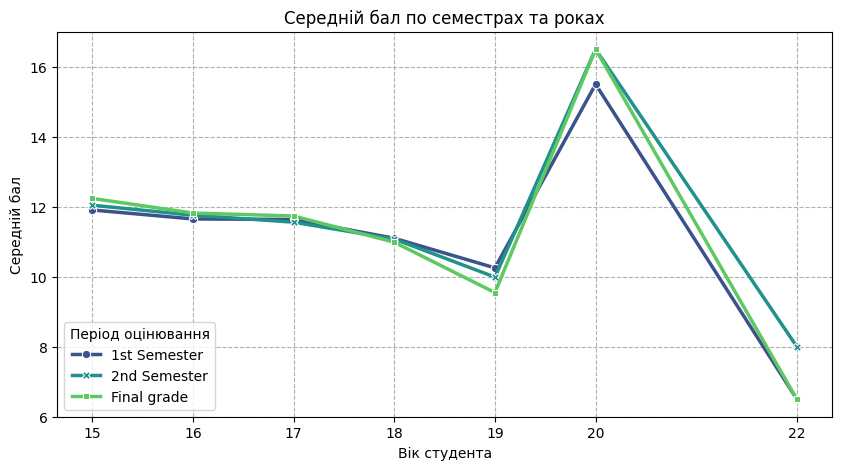

In [ ]:
###EACH SEMESTER CHART FOR AGE AND GRADES

combined_grades_df = final_grades_df.copy()
combined_grades_df['G1_avg'] = (combined_grades_df['G1_math'] + combined_grades_df['G1_port']) / 2
combined_grades_df['G2_avg'] = (combined_grades_df['G2_math'] + combined_grades_df['G2_port']) / 2
combined_grades_df['G3_avg'] = (combined_grades_df['G3_math'] + combined_grades_df['G3_port']) / 2

age_summary_df = combined_grades_df.groupby('age')[['G1_avg', 'G2_avg', 'G3_avg']].mean().reset_index()
summary_long = age_summary_df.melt(
    id_vars='age',
    value_vars=['G1_avg', 'G2_avg', 'G3_avg'],
    var_name='Semester_Type',
    value_name='Average_Score'
)

summary_long['Semester_Type'] = summary_long['Semester_Type'].str.replace('_avg', '').replace({'G1': '1st Semester', 'G2': '2nd Semester', 'G3': 'Final grade'})
semester_order = ['1st Semester', '2nd Semester', 'Final grade']

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=summary_long,
    x='age',
    y='Average_Score',
    hue='Semester_Type',
    hue_order=semester_order,
    style='Semester_Type',
    markers=True,
    dashes=False,
    palette='viridis',
    linewidth=2.5
)

plt.title('Середній бал по семестрах та роках')
plt.xlabel('Вік студента')
plt.ylabel('Середній бал')
plt.xticks(summary_long['age'].unique())
plt.legend(title='Період оцінювання', loc='lower left')
plt.grid(True, linestyle='--', alpha=1)

plt.show()

Учні 15–18 років мають стабільні оцінки.
Студенти 20–22 років мають вищі коливання: дехто значно кращий, дехто гірший.
Вік не є визначальним фактором, але після 20 років спостерігаються відмінності




**Отже, висновки:**
Наш аналіз показав, що хоча більшість побутових факторів не дають різких відмінностей, деякі тенденції все ж простежуються. Нприклад,діти, чиї батьки живуть окремо, у середньому показують трохи вищі результати, а от розмір сім’ї майже не змінює ситуацію; у 20 років студенти показують найкращі результати, хоча в 21 вже успішність набагато гірша.

Загалом, із дослідження помітно, що успішність формується не одним фактором, а взаємодією кількох умов - побутових, поведінкових та особистісних. Тобто вплив є, але він комплексний і проявляється не у вигляді різких стрибків, а через сукупність дрібних тенденцій.
